<a href="https://colab.research.google.com/github/nualpair/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ

1. ข้อมูลโจทย์ อยู่ใน ตัวแปร Data
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.
กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

##**1.ข้อมูลโจทย์ อยู่ใน ตัวแปร Data**

In [2]:
Name = 'นวลแพร พนาวัฒนวงศ์'
ID = '6230205250'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:18


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-5.191188,-8.129646,-5.254458,-7.684054,-4.328870,0.980308,-10.213553,-8.662818,3.755561,1.617667,-4.903692,-2.846241,0.098773,-2.505052,-7.111769,9.284461,8.008362,6.210255,-10.102908,-9.136705,-7.695932,1.377489,2.475263,5.145355,5.809575,4.702331,-9.094927,1.573306,2.569877,-5.655379,-16.259291,-26.276893
1,1.046871,-5.067973,-1.926690,3.191855,4.790445,8.647196,3.999978,0.625686,-7.537170,-1.704324,-1.775825,-3.277821,2.769913,6.470956,2.317229,2.106386,3.617422,8.076046,7.454291,6.805689,-3.156522,-4.470494,8.728150,-0.307797,-0.403314,2.071936,3.306866,6.976058,1.444678,9.516098,-10.135946,49.580489
2,-4.718223,-2.395123,-1.268311,-6.931658,-7.999089,-6.873142,7.865120,1.020438,-4.579835,-9.627431,1.544302,-4.340265,1.652095,0.096776,8.139325,3.550814,-1.032307,9.619451,4.893464,-8.899522,-9.993050,-0.195729,4.267802,0.802401,-5.736055,-2.654798,-7.703494,-5.805522,-7.496141,5.883560,-4.790245,31.417802
3,-0.701348,-1.586777,-1.649968,10.144477,1.423074,-6.196514,7.427202,-2.897082,5.138948,-2.716690,-7.879515,0.733173,-4.788574,-5.382367,-4.975622,2.313075,-1.960875,9.403659,3.302035,-6.676770,5.453811,-8.158554,-10.735358,-2.099596,5.419817,-3.750577,-3.118221,9.436805,11.958372,1.126991,-3.173554,7.634955
4,-7.297744,-3.053870,-7.361839,8.313045,7.090023,-8.292757,10.968772,5.851835,6.422459,3.576011,-7.719684,-3.545237,9.289975,-3.583167,-6.712051,-5.483730,0.844172,-9.263109,3.736532,-7.259345,-3.120636,-7.910700,3.424986,-4.026721,4.604423,2.415344,-2.022687,-8.636169,9.461380,3.051406,-6.107741,17.257032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.324798,4.321730,-3.598509,-8.509085,7.013405,0.818931,-3.649517,0.033867,-3.231990,-3.419830,2.443420,2.384634,-4.369484,-2.543548,-4.311272,1.721757,-6.243514,1.214882,7.219794,-7.889024,6.471465,-3.213156,5.492958,4.407556,4.305505,0.880544,3.992240,2.751840,-1.802647,0.001980,8.643459,2.009898
9996,1.890087,7.293610,6.863433,6.632289,-9.989907,4.601259,-2.795348,0.635931,3.955350,-5.541375,-5.900910,3.986756,6.040688,6.773535,5.990024,-9.907123,-8.923343,6.089695,-3.775023,-6.220770,6.397983,10.302641,1.365863,-8.079973,3.896048,-2.082399,2.375078,6.560023,-1.749878,0.006546,14.587220,2.032729
9997,0.619360,-11.576563,3.573630,0.537456,5.111649,-0.364278,-2.946042,-3.353901,2.095922,-9.025389,4.403808,10.152292,10.278728,5.816645,-3.566783,4.109821,1.376686,3.124918,-4.771744,3.105651,-7.754048,4.355187,-4.946475,-7.534463,-4.081373,-6.483472,8.703016,-5.990320,-6.399336,-8.016079,-23.153126,-38.080396
9998,3.024196,2.580067,3.382397,5.376666,-2.317921,-8.906724,7.938046,6.659564,0.062386,6.402132,-1.264679,6.025819,4.016329,3.731674,10.335109,10.207853,7.642827,-2.418987,-7.918746,7.078518,-9.669522,-2.498255,-5.470312,10.170237,-4.053812,-4.170263,-2.956828,-9.370553,0.313097,-8.224965,5.160133,-39.124827


**เนื่องจากข้อมูลข้างต้นมีจำนวนมาก จึงต้องตัดตัวที่มี Correlation ออกไป เพื่อลดข้อมูลที่ไม่จำเป็นออกไป**

In [6]:
Data.shape#ดูขนาดของข้อมูล Data

(10000, 32)

In [7]:
corr = np.corrcoef(Data.to_numpy().T)

In [8]:
corr.shape

(32, 32)

In [9]:
corr

array([[ 1.        ,  0.08014141,  0.15187838, ...,  0.24105713,
         0.08014141,  0.24105713],
       [ 0.08014141,  1.        ,  0.16295984, ...,  0.05834063,
         1.        ,  0.05834063],
       [ 0.15187838,  0.16295984,  1.        , ..., -0.20056412,
         0.16295984, -0.20056412],
       ...,
       [ 0.24105713,  0.05834063, -0.20056412, ...,  1.        ,
         0.05834063,  1.        ],
       [ 0.08014141,  1.        ,  0.16295984, ...,  0.05834063,
         1.        ,  0.05834063],
       [ 0.24105713,  0.05834063, -0.20056412, ...,  1.        ,
         0.05834063,  1.        ]])

###**เนื่องจากมีจำนวนข้อมูลที่มาก จึงต้องหาค่า Correlation ที่ซ้ำกัน**

In [10]:
for i in range(corr.shape[0]): #ใช้คำสั่งวนลูปเพื่อดูค่าที่ซ้ำกัน พิจารณาจากค่าที่แสดงผล ถ้ามีการแสดงผลแสดงว่ามีค่าซ้ำ
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


##**2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ**


###**Import**

In [11]:
from sklearn.cluster import KMeans

###**Difine**

In [12]:
kmeans = KMeans(n_clusters=3,random_state=2021)
#กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เพราะkmeanมีdefult)
#random_state=2021 ให้ทุกคนเริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

###**Fit- transform**

**คำนวณจุด cluter centers ของข้อมูล example_df_drop ด้วยวิธี K-means clustering**

In [13]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

###**แสดงจุด cluster centers ที่คำนวณออกมาได้**

In [14]:
kmeans.cluster_centers_

array([[ -1.86974667,  -2.5180617 ,   0.52753118,  -0.43487932,
         -0.72134316,  -1.3100839 ,  -2.91105722,  -2.55402764,
         -2.53759557,   3.95343932,  -0.17808351,   2.17215555,
          3.2525345 ,   3.02194518,  -0.67451587,   4.10835748,
          3.76502317,   3.22976268,  -6.35918999,   0.84361169,
         -0.85965019,  -0.49622771,  -1.64186242,   1.20653214,
         -0.13519738,  -2.19649444,  -2.25613815,  -0.85406148,
          2.71627842,  -7.82696739,  -5.03612339, -37.13483693],
       [  1.2922677 ,   2.71270039,  -2.18969926,   1.51099542,
          1.33649906,  -1.62068468,   2.69604892,   2.12727828,
          3.98871019,  -2.28956923,   0.69657613,  -0.4478563 ,
         -1.35321459,  -1.1691861 ,  -3.91527375,  -0.42612738,
         -0.0946426 ,   1.7282035 ,   1.48587324,  -1.83606347,
          1.07404512,  -0.96336669,  -0.44807865,  -2.22662162,
          3.93848247,  -3.02230771,   0.55850829,   1.99442784,
          1.32966187,   2.34816273,   5

In [15]:
#ทดสอบการจัดกลุ่มของ Data
H = kmeans.predict(Data)
H

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

**ทำ PCA ลด Dimention**

In [16]:
pca = PCA(n_components=2)

In [17]:
new_pca = pca.fit_transform(Data)

In [18]:
import matplotlib

In [19]:
matplotlib.rcParams['figure.figsize']=[15,20]

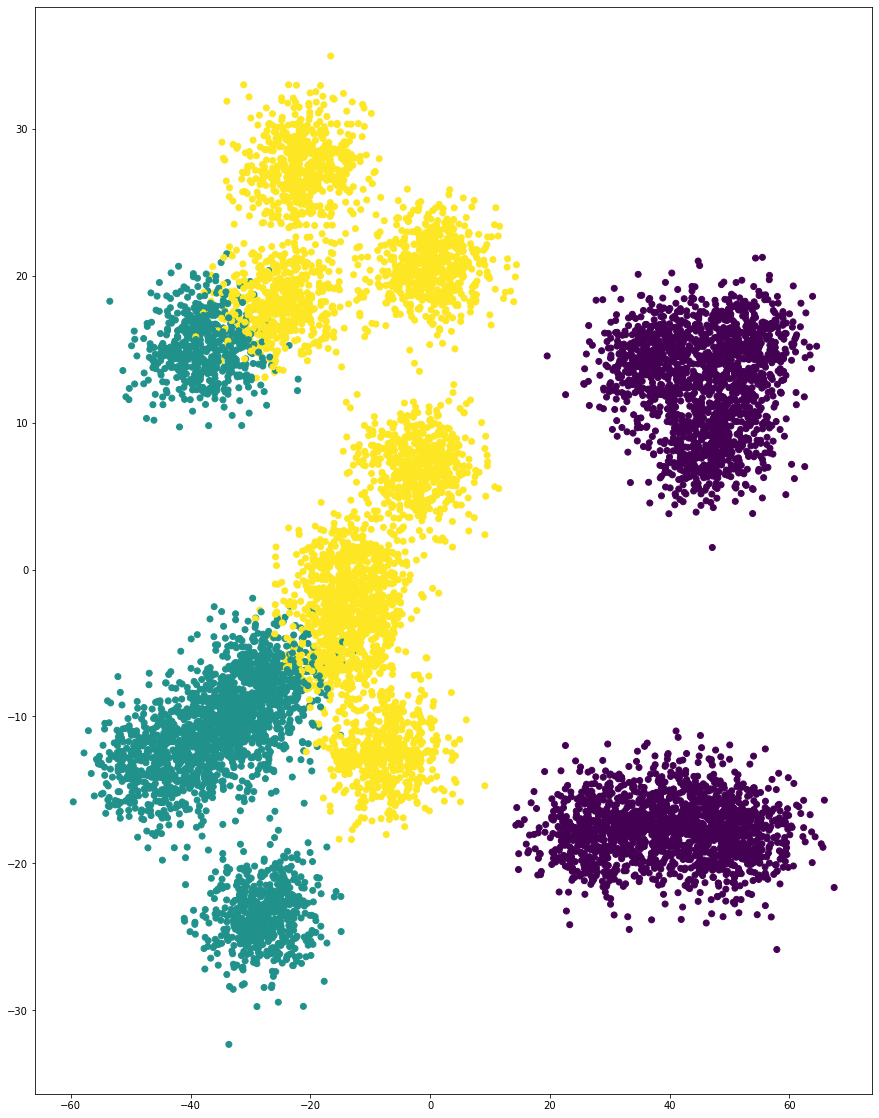

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Data)
H = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=H)

**ทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data**

**ใช้วิธีการหาค่า k ด้วยวิธี " The elbow method** 

In [21]:
#เริ่มแรกทำการคำนวนค่า SSE ของ data
kmeans.inertia_ ##ค่าของ SSE Sum of Squared error

10614262.954670511

In [22]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [23]:
SSE

[21537188.23243286,
 12341228.158529218,
 10614262.954670511,
 9539722.535145095,
 8482892.195425048,
 7711025.407762224,
 6871065.825043915,
 6183352.397666607]

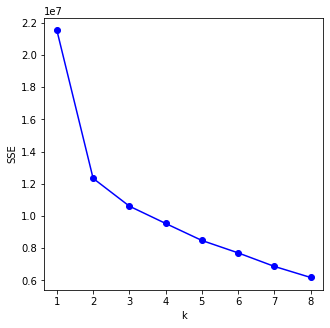

In [24]:
#ทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

**จากกราฟ จะเห็นว่าจุด 1-2 มีระยะห่างอีกแบบ แต่ตั้งแต่จุดสองเป็นต้นไประยะห่างระหว่างจุดมีค่าใกล้เคียงกัน ดังนั้น ค่า K ที่เหมาะสม คือ 2 กลุ่ม**

**การหาค่า k ด้วยวิธี The silhouette coefficient**

###**The silhouette coefficient**

In [25]:
from sklearn import metrics

In [26]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

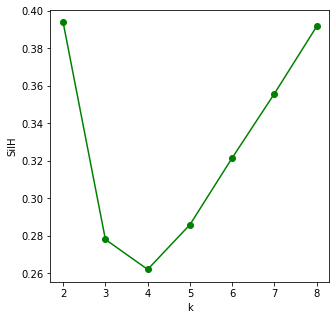

In [27]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH');


**จากกราฟจะบอกได้ว่า k มีทั้งหมด 3 กลุ่ม ดูค่าได้โดยมีจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วงที่ k เท่ากับ 2 , 3 และ 6**

**ลองนำค่า k ที่ได้มาแบ่งกลุ่มอีกครั้ง**

In [28]:
matplotlib.rcParams['figure.figsize']=[15,20]

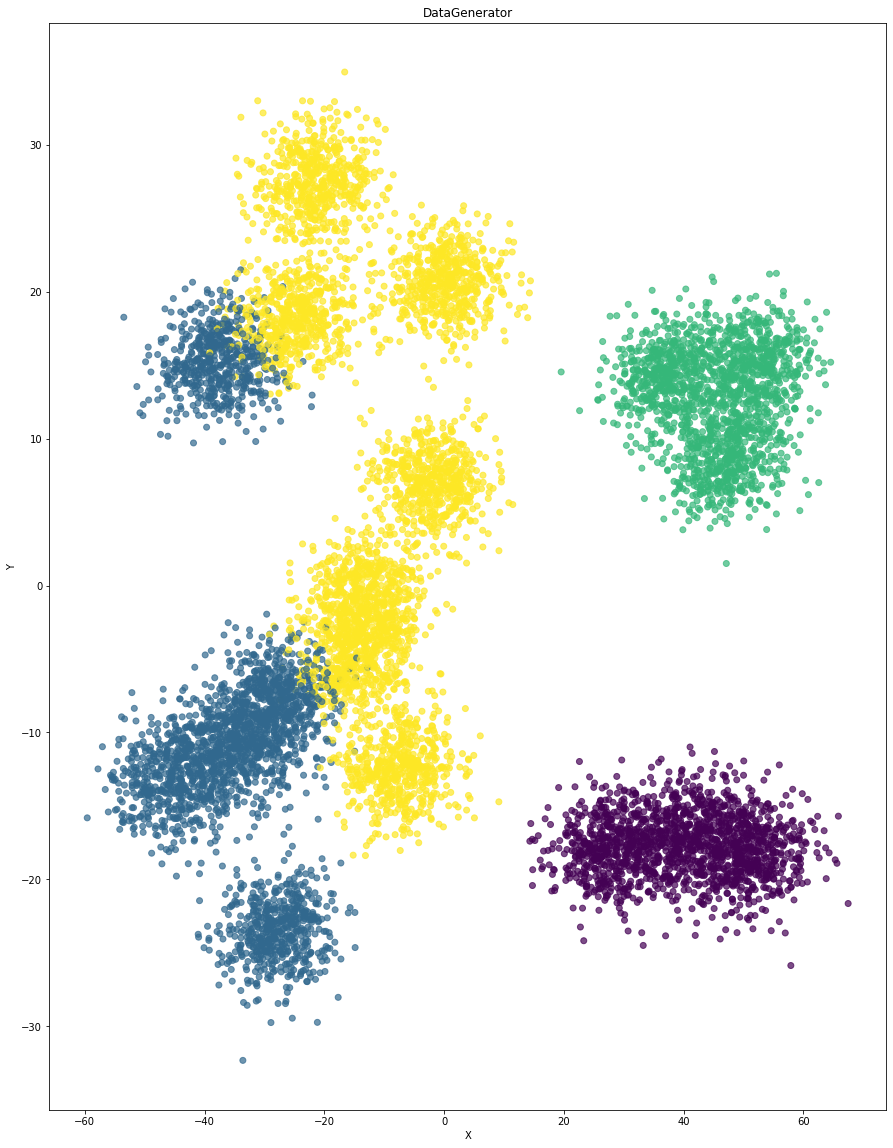

In [29]:
kmeans = KMeans(n_clusters = 4,random_state=2021)
kmeans.fit(Data)
H = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=H,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากกราฟจะเห็นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 4 กลุ่มแล้ว จะมีข้อมูลบางจำนวนที่ทับซ้อนกัน และเห็นได้อีกว่าข้อมูลชุดนี้ปริมาณที่มาก

##**3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

###**MDS**

In [30]:
from sklearn.manifold import MDS

In [31]:
mds = MDS(n_components=2)#กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [32]:
new_mds = mds.fit_transform(Data)#ทำการคำนวณข้อมูล คำนวณระยะห่างระหว่างจุด

KeyboardInterrupt: ignored

K-mean

In [ ]:
kmeans_2 = KMeans(n_clusters=4,random_state=2021)
kmeans_2.fit(Data)
P = kmeans_2.predict(Data)

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=P,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

##**4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=H,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=P,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากการเปรียบเทียบกราฟทั้งข้อ 2 และข้อ 3 จะพบว่าการกระจายของข้อมูลนั้นต่างกัน

และข้อที่ 2 มีการจัดกลุ่มโดยการ clustering ก่อนที่จะทำการลด Dimention ด้วยวิธี PCA ซึ่งเป็นการลดไดเมนชั่น โดยที่ทุกๆจุดของข้อมูลจะอยู่ที่เดิม

และข้อ 3 มีการลดไดเมนชั่นของข้อมูลก่อน ค่อยนำข้อมูลที่ลดไดเมชั่นแล้วไปทำการ clustering ซึ่งทำการลด Dimention ด้วยวิธี MDS ซึ่งเป็นการลดไดเมนชั่น โดยที่ทุกๆจุดของข้อมูลจะยึดจุดตั้งต้นที่กำหนดเป็นหลัก